# Time Series Playground
Read and analyze time-series data over iguazio data platform 

### Step1: Load Requiered Libraries

In [1]:
import numpy as np
import pandas as pd
import time, datetime

In [ ]:
!pip install pandas-datareader

In [7]:
from pandas_datareader import data
import datetime
start = datetime.datetime(2013, 1, 1)
end = datetime.datetime(2013, 1, 17)
stocks = data.DataReader(["MSFT","AAPL"], 'yahoo', start, end)
stocks.info()
stocks.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2013-01-02 to 2013-01-17
Data columns (total 12 columns):
(High, AAPL)         12 non-null float64
(High, MSFT)         12 non-null float64
(Low, AAPL)          12 non-null float64
(Low, MSFT)          12 non-null float64
(Open, AAPL)         12 non-null float64
(Open, MSFT)         12 non-null float64
(Close, AAPL)        12 non-null float64
(Close, MSFT)        12 non-null float64
(Volume, AAPL)       12 non-null int64
(Volume, MSFT)       12 non-null int64
(Adj Close, AAPL)    12 non-null float64
(Adj Close, MSFT)    12 non-null float64
dtypes: float64(10), int64(2)
memory usage: 1.2 KB


Attributes       High                   Low                  Open             \
Symbols          AAPL       MSFT       AAPL       MSFT       AAPL       MSFT   
Date                                                                           
2013-01-02  79.285713  27.730000  77.375717  27.150000  79.117142  27.250000   
2013-01-03  78.524284  27.650000  77.285713  27.160000  78.268570  27.629999   
2013-01-04  76.947144  27.340000  75.118568  26.730000  76.709999  27.270000   
2013-01-07  75.614288  26.879999  73.599998  26.639999  74.571426  26.770000   
2013-01-08  75.984283  26.790001  74.464287  26.459999  75.601425  26.750000   

Attributes      Close                Volume            Adj Close             
Symbols          AAPL       MSFT       AAPL      MSFT       AAPL       MSFT  
Date                                                                         
2013-01-02  78.432854  27.620001  140129500  52899300  70.128860  23.875433  
2013-01-03  77.442856  27.250000   88241300  48294400  69.243675  23.555593  
2013-01-04  75.285713  26.740000  148583400  52521100  67.314934  23.114735  
2013-01-07  74.842857  26.690001  121039100  37110400  66.918953  23.071518  
2013-01-08  75.044289  26.549999  114676800  44703100  67.099052  22.950497

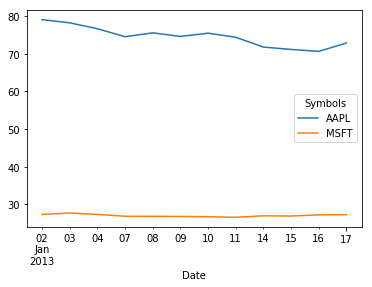

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
stocks["Open"].plot()

### Step 2: Read the data from a CSV file

In [4]:
df = pd.read_csv('intraday_1min_MSFT.csv',parse_dates=[0])
df.index = df['timestamp']
del df['timestamp']

### Step 3: Explore the data

In [5]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2018-07-06 16:00:00 to 2018-07-06 14:21:00
Data columns (total 5 columns):
open      100 non-null float64
high      100 non-null float64
low       100 non-null float64
close     100 non-null float64
volume    100 non-null int64
dtypes: float64(4), int64(1)
memory usage: 4.7 KB


,open,high,low,close,volume
timestamp,,,,,
2018-07-06 16:00:00,101.1800,101.250,101.100,101.16,3036619
2018-07-06 15:59:00,101.1400,101.190,101.135,101.17,179669
2018-07-06 15:58:00,101.1550,101.190,101.110,101.14,104014
2018-07-06 15:57:00,101.1207,101.185,101.075,101.16,124452
2018-07-06 15:56:00,101.1050,101.150,101.080,101.12,118824


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df['close'].plot()

In [7]:
df.resample('H').mean()

,open,high,low,close,volume
timestamp,,,,,
2018-07-06 14:00:00,101.061174,101.076387,101.048031,101.062792,1.868979e+04
2018-07-06 15:00:00,101.197410,101.227382,101.170488,101.198433,4.937635e+04
2018-07-06 16:00:00,101.180000,101.250000,101.100000,101.160000,3.036619e+06


### Generate and plot random time series  

<Figure size 432x288 with 0 Axes>

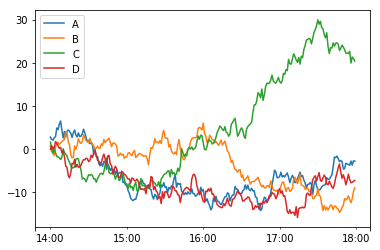

In [56]:
rng = pd.date_range('1/1/2018 14:00', periods=240, freq='60S')
df = pd.DataFrame(np.random.randn(len(rng), 4), index=rng, columns=list('ABCD'))
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

In [50]:
rng = pd.date_range('22/9/2018 02:30', periods=600, freq='5S')
df = pd.DataFrame(np.random.randn(len(rng), 2), index=rng, columns=['high','low'])
df = df.cumsum()
df.tail()

,high,low
2018-09-22 03:19:35,25.082517,28.258404
2018-09-22 03:19:40,26.303303,30.332901
2018-09-22 03:19:45,24.837130,28.939327
2018-09-22 03:19:50,24.054695,29.713711
2018-09-22 03:19:55,24.889503,30.316828


In [40]:
def getdf(name, lbl, size):
    names = [name] * size
    labels = [lbl] * size
    vals = np.cumsum(np.random.randn(size))
    times = [ 'now%dm' %i for i in range(-size ,0)]
    return pd.DataFrame({'name':names, 'labels':labels, 'val': vals, 'time':  times})
    
dfs = [getdf(name,lbl,120) for name,lbl in [('cpu','node=1'),('mem','node=1'),('cpu','node=2'),('mem','node=2')]]
df = pd.concat(dfs, ignore_index=True)
df.head(20)
df.to_csv('tsdbtst.csv', header=False, index=False)
                  

In [ ]:
%matplotlib inline
#import matplotlib.pyplot as plt
df.plot()